In [744]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

import time

import warnings
warnings.filterwarnings('ignore')

In [745]:
df = pd.read_csv("data.csv")

**Her bir feature için NaN değer var mı diye dataframe'i kontrol ediyorum.**

In [746]:
count_nan = df.isnull().sum()
print(count_nan.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Tek bir değere sahip olan featureları siliyorum.**

In [747]:
for col in df.columns:
    print(col,df[col].nunique())
    if(df[col].nunique() == 1):
        df.drop(col,inplace=True, axis=1)

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [748]:
for col in df:
    if(len(df[col].unique()) <= 10):
        print(col,df[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
Education [2 1 4 3 5]
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction [2 3 4 1]
Gender ['Female' 'Male']
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction [4 2 3 1]
MaritalStatus ['Single' 'Married' 'Divorced']
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
OverTime ['Yes' 'No']
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]


In [749]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0, 'Married':1,'Divorced':0.5})

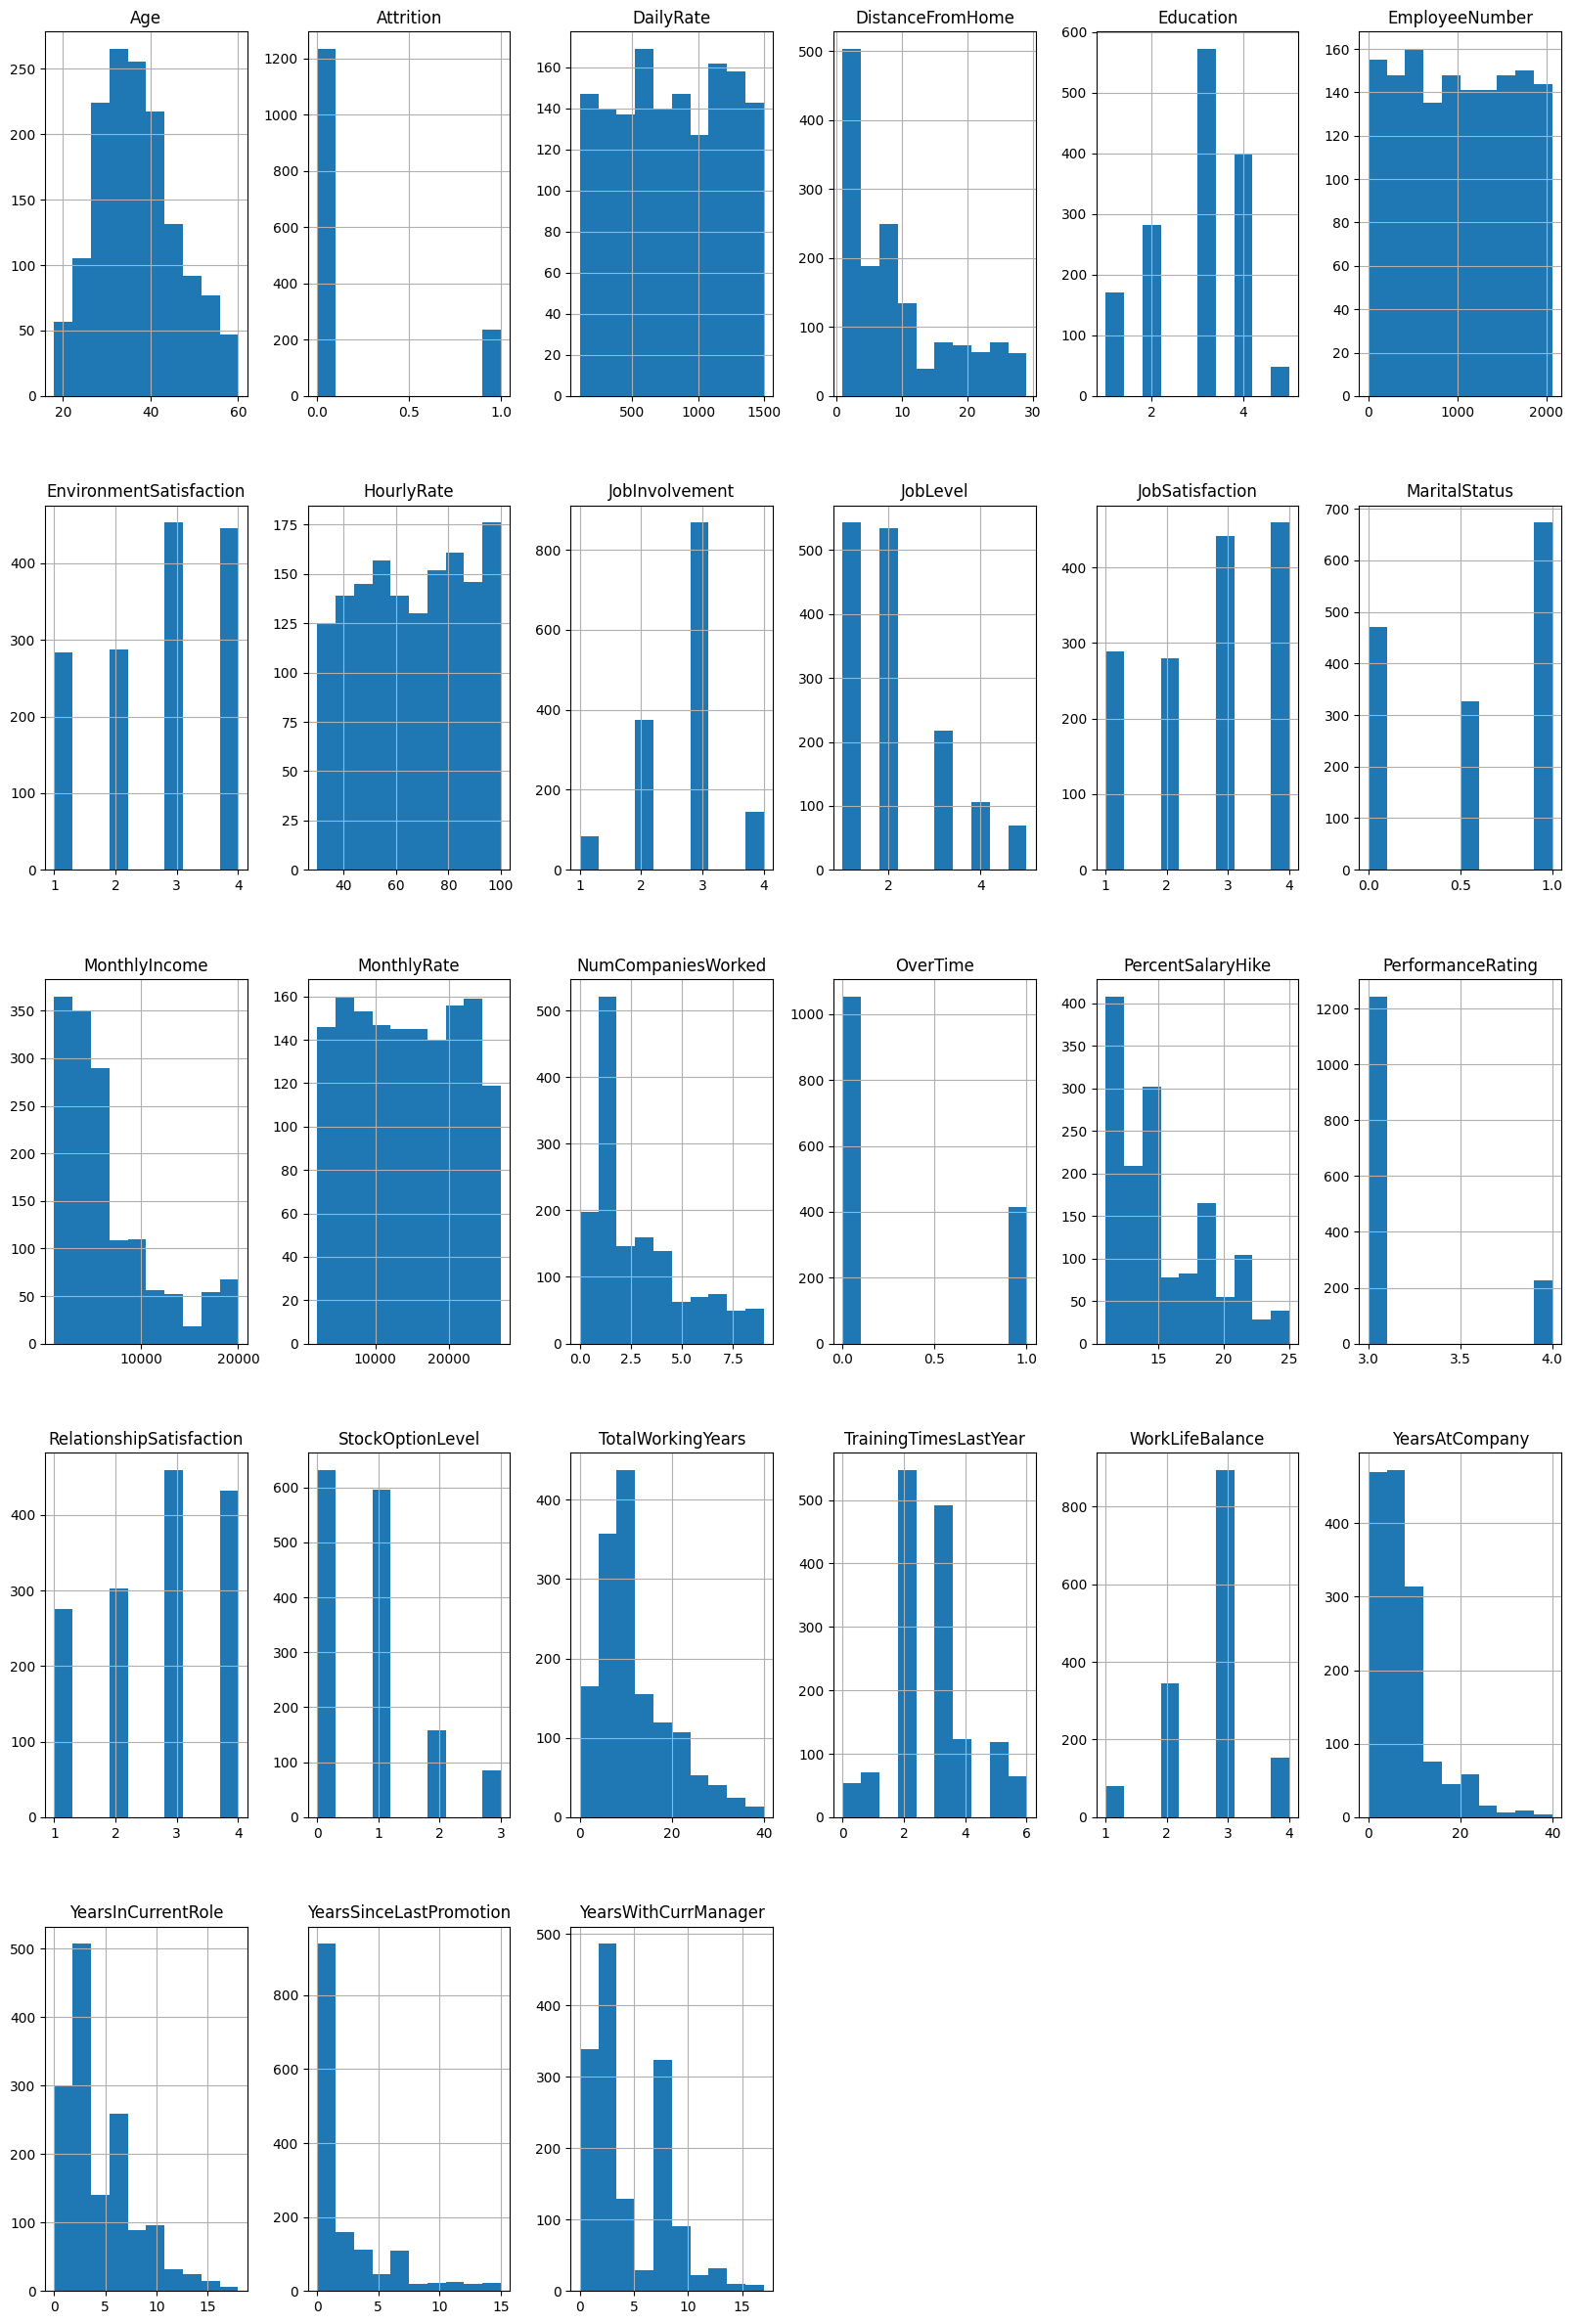

In [750]:
df[df.columns].hist(layout=(5,6), figsize=(20,30));

**EmployeeNumber feature olarak bize bir şey katmadığı için onu da kaldırıyorum.**

In [751]:
df.drop("EmployeeNumber",inplace = True, axis = 1)

In [752]:
df.describe().astype(int)

Age  Attrition  DailyRate  DistanceFromHome  Education  \
count  1470       1470       1470              1470       1470   
mean     36          0        802                 9          2   
std       9          0        403                 8          1   
min      18          0        102                 1          1   
25%      30          0        465                 2          2   
50%      36          0        802                 7          3   
75%      43          0       1157                14          4   
max      60          1       1499                29          5   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
count                     1470        1470            1470      1470   
mean                         2          65               2         2   
std                          1          20               0         1   
min                          1          30               1         1   
25%                          2          48               2         1   
50%                          3          66               3         2   
75%                          4          83               3         3   
max                          4         100               4         5   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count             1470  ...               1470                      1470   
mean                 2  ...                  3                         2   
std                  1  ...                  0                         1   
min                  1  ...                  3                         1   
25%                  2  ...                  3                         2   
50%                  3  ...                  3                         3   
75%                  4  ...                  3                         4   
max                  4  ...                  4                         4   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count              1470               1470                   1470   
mean                  0                 11                      2   
std                   0                  7                      1   
min                   0                  0                      0   
25%                   0                  6                      2   
50%                   1                 10                      3   
75%                   1                 15                      3   
max                   3                 40                      6   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count             1470            1470                1470   
mean                 2               7                   4   
std                  0               6                   3   
min                  1               0                   0   
25%                  2               3                   2   
50%                  3               5                   3   
75%                  3               9                   7   
max                  4              40                  18   

       YearsSinceLastPromotion  YearsWithCurrManager  
count                     1470                  1470  
mean                         2                     4  
std                          3                     3  
min                          0                     0  
25%                          0                     2  
50%                          1                     3  
75%                          3                     7  
max                         15                    17  

[8 rows x 26 columns]

In [753]:
cor_matrix = df.corr().abs()

for col in cor_matrix.columns:
    for another_col in cor_matrix:
        if cor_matrix[col][another_col] >= 0.9:
            if(col != another_col):
                print("Correlation between",col,another_col,cor_matrix[col][another_col])

Correlation between JobLevel MonthlyIncome 0.9502999134798477
Correlation between MonthlyIncome JobLevel 0.9502999134798477


In [754]:
df.drop('JobLevel',inplace= True, axis = 1)

In [755]:
from numpy import unique

for col in df.columns:
    num = len(df[col].unique())
    percentage = float(num) / df.shape[0] * 100
    print(col,"%.2f" %percentage)

Age 2.93
Attrition 0.14
BusinessTravel 0.20
DailyRate 60.27
Department 0.20
DistanceFromHome 1.97
Education 0.34
EducationField 0.41
EnvironmentSatisfaction 0.27
Gender 0.14
HourlyRate 4.83
JobInvolvement 0.27
JobRole 0.61
JobSatisfaction 0.27
MaritalStatus 0.20
MonthlyIncome 91.77
MonthlyRate 97.07
NumCompaniesWorked 0.68
OverTime 0.14
PercentSalaryHike 1.02
PerformanceRating 0.14
RelationshipSatisfaction 0.27
StockOptionLevel 0.27
TotalWorkingYears 2.72
TrainingTimesLastYear 0.48
WorkLifeBalance 0.27
YearsAtCompany 2.52
YearsInCurrentRole 1.29
YearsSinceLastPromotion 1.09
YearsWithCurrManager 1.22


**Duplicated row var mı diye bakıyoruz. ML modelimiz duplicated rowları kaldırdığımızda daha iyi performans vericektir.** 

In [756]:
duplicated_rows = df.duplicated()

In [757]:
print(df[duplicated_rows])

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 30 columns]


In [758]:
print(duplicated_rows.any())

False


**Duplicated row yokmuş.**

# One-Hot Encoding

In [759]:
data = df.copy()
data = pd.get_dummies(data)

# Normalizasyon

In [760]:
scale = MinMaxScaler()
data = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)

# Train-Valid-Test Split

**train: 70%**
**test: 15%**
**validation: 15%**

In [761]:
SEED = 12345

X_train, X_test, y_train, y_test = train_test_split(data.drop('Attrition', axis=1), data["Attrition"], 
                                                    test_size=0.15, random_state=SEED)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                test_size=0.176, random_state=SEED)

# Modellerin Eğitilmesi

**Logistic Regression**

In [795]:

start = time.time()
Lr = LogisticRegressionCV(cv=5, random_state=SEED)
Lr.fit(X_train, y_train)
LR_time = time.time() - start
y_pred = cross_val_predict(Lr,X_test, y_test, cv=5)
scores = cross_val_score(Lr, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

print('Logistic Regression Model Training Time: ', round(LR_time,2))

Cross-Validation Accuracy Scores [0.88834951 0.86893204 0.85436893 0.86407767 0.90243902]
Logistic Regression Model Training Time:  6.26


Confusion Matrix:


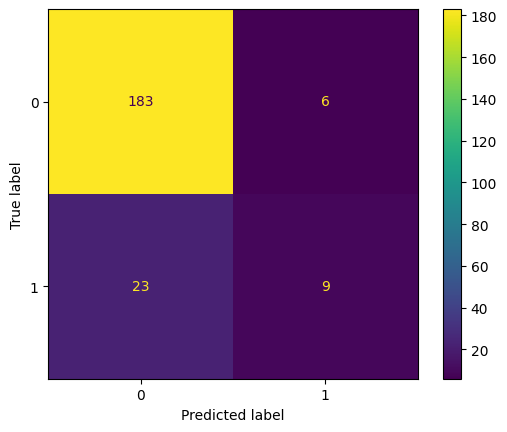

Accuracy: 0.87
Precision: 0.6
Recall: 0.28
Weighted F1 Score: 0.85


In [763]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))
print("Precision:",round(metrics.precision_score(y_test, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_test, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_test, y_pred,average ='weighted'),2))

**SVM**

In [764]:
from sklearn import svm
start = time.time()
svm_model = svm.SVC(random_state=SEED, kernel='linear') 
svm_model.fit(X_train, y_train)
cv = KFold(n_splits=5, random_state=SEED, shuffle=True)

scores = cross_val_score(svm_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Accuracy Scores', scores)

y_pred = cross_val_predict(svm_model, X_test, y_test, cv=5)
SVM_time = time.time() - start
print('SVM Model Training Time: ', round(SVM_time,2))

Cross-Validation Accuracy Scores [0.89805825 0.88834951 0.86893204 0.89320388 0.78536585]
SVM Model Training Time:  5.16


Confusion Matrix:


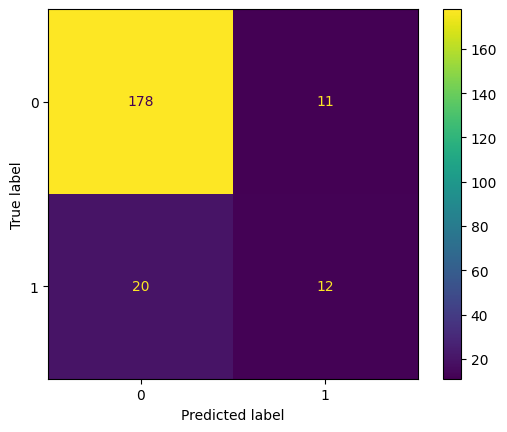

Accuracy: 0.86
Precision: 0.52
Recall: 0.38
Weighted F1 Score: 0.85


In [765]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))
print("Precision:",round(metrics.precision_score(y_test, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_test, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_test, y_pred,average ='weighted'),2))

**Random Forest**

In [766]:
start = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross-Validation Accuracy Scores', scores)
y_pred = cross_val_predict(rf, X_test, y_test, cv=5)
RF_time = time.time() - start
print('Random Forest Model Training Time: ', round(RF_time,2))

Cross-Validation Accuracy Scores [0.8592233  0.88349515 0.84951456 0.81067961 0.82926829]
Random Forest Model Training Time:  4.33


Confusion Matrix:


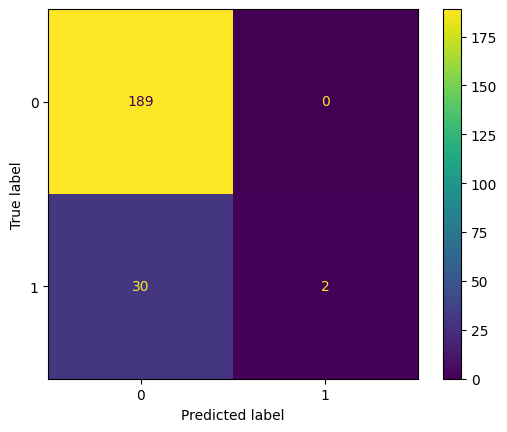

Accuracy: 0.86
Precision: 1.0
Recall: 0.06
Weighted F1 Score: 0.81


In [767]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))
print("Precision:",round(metrics.precision_score(y_test, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_test, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_test, y_pred,average ='weighted'),2))

# Metrik Raporları

**Logistic Regression**

Confusion Matrix:


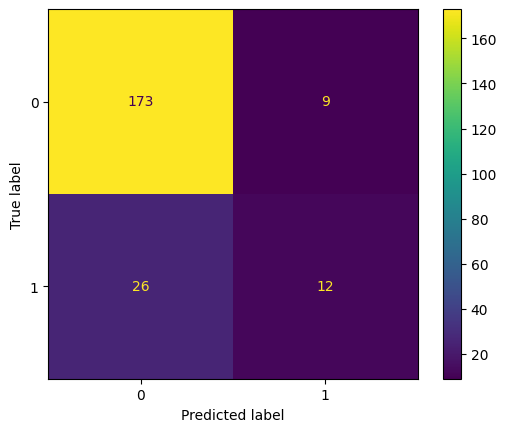

Accuracy: 0.84
Precision: 0.57
Recall: 0.32
Weighted F1 Score: 0.82


In [768]:
y_val_pred = cross_val_predict(Lr,X_validation,y_validation, cv=5)

confusion_matrix = metrics.confusion_matrix(y_validation, y_val_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_validation, y_val_pred),2))
print("Precision:",round(metrics.precision_score(y_validation, y_val_pred),2)) 
print("Recall:",round(metrics.recall_score(y_validation, y_val_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_validation, y_val_pred,average ='weighted'),2))

**SVM**

Confusion Matrix:


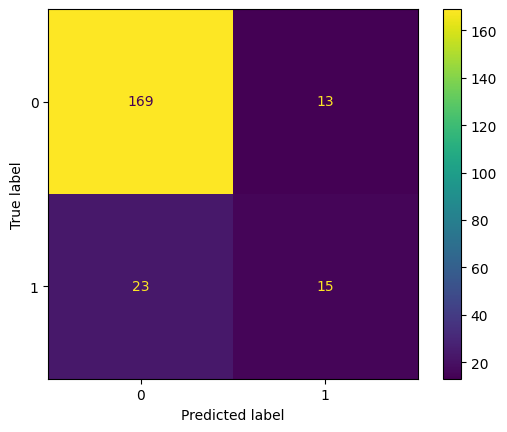

Accuracy: 0.84
Precision: 0.54
Recall: 0.39
Weighted F1 Score: 0.83


In [769]:

y_val_pred = cross_val_predict(svm_model, X_validation, y_validation, cv=5)

confusion_matrix = metrics.confusion_matrix(y_validation, y_val_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_validation, y_val_pred),2))
print("Precision:",round(metrics.precision_score(y_validation, y_val_pred),2)) 
print("Recall:",round(metrics.recall_score(y_validation, y_val_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_validation, y_val_pred,average ='weighted'),2))

**Random Forest**

Confusion Matrix:


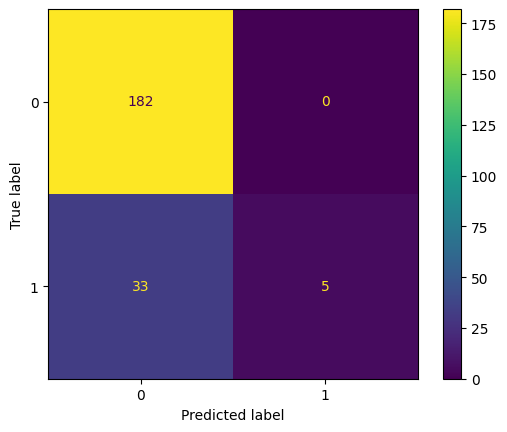

Accuracy: 0.85
Precision: 1.0
Recall: 0.13
Weighted F1 Score: 0.8


In [770]:
y_val_pred = cross_val_predict(rf, X_validation, y_validation, cv=5)

confusion_matrix = metrics.confusion_matrix(y_validation, y_val_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_validation, y_val_pred),2))
print("Precision:",round(metrics.precision_score(y_validation, y_val_pred),2)) 
print("Recall:",round(metrics.recall_score(y_validation, y_val_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_validation, y_val_pred,average ='weighted'),2))

# Overfit control

**Validation seti üzerinde yaptığımız testler sonucunda aldığımız Accuracy değerleri modeli eğitirken aldığımız accuracy değerlerinden çok daha düşük olmadığı için (yüksek varyans olmadığı için), üç modelimizde de overfitting olmadığını söyleyebiliriz.**

# Başarım ve Eğitim Süreleri Karşılaştırılması

In [771]:
print('Logistic Regression Model Training Time: ', round(LR_time,2))
print('SVM Model Training Time: ', round(SVM_time,2))
print('Random Forest Model Training Time: ', round(RF_time,2))

Logistic Regression Model Training Time:  8.73
SVM Model Training Time:  5.16
Random Forest Model Training Time:  4.33


In [772]:
y_pred_LR = cross_val_predict(Lr,X_validation, y_validation, cv=5)
y_pred_SVM = cross_val_predict(svm_model,X_validation, y_validation, cv=5)
y_pred_RF = cross_val_predict(rf,X_validation, y_validation, cv=5)

acc = [round(metrics.accuracy_score(y_validation, y_pred_LR),2),
                round(metrics.accuracy_score(y_validation, y_pred_SVM),2),
                round(metrics.accuracy_score(y_validation, y_pred_RF),2)]

pre = [round(metrics.precision_score(y_validation, y_pred_LR),2),
                round(metrics.precision_score(y_validation, y_pred_SVM),2),
                round(metrics.precision_score(y_validation, y_pred_RF),2)]

rec = [round(metrics.recall_score(y_validation, y_pred_LR),2),
                round(metrics.recall_score(y_validation, y_pred_SVM),2),
                round(metrics.recall_score(y_validation, y_pred_RF),2)]
f1 = [round(metrics.f1_score(y_validation, y_pred_LR),2),
                round(metrics.f1_score(y_validation, y_pred_SVM),2),
                round(metrics.f1_score(y_validation, y_pred_RF),2)]

metric_df = pd.DataFrame({"Accuracy":acc, "Precision":pre,"Recall":rec,"Weighted F1":f1},
                            index=["Logistic Regression","SVM","Random Forest"])

metric_df

Accuracy  Precision  Recall  Weighted F1
Logistic Regression      0.84       0.57    0.32         0.41
SVM                      0.84       0.54    0.39         0.45
Random Forest            0.85       0.83    0.13         0.23

# Modellerin Optimize Edilmesi

**Optimized Logistic Regression**

Optimal Threshold value is: 0.24190976026516572


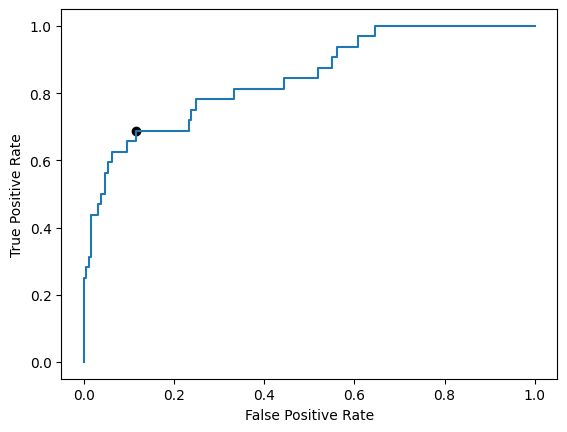

In [773]:
start = time.time()
logistic_reg_opt = LogisticRegressionCV(cv=5, random_state=SEED)
logistic_reg_opt.fit(X_train, y_train)

y_pred_proba = logistic_reg_opt.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
LRO_time = time.time()-start
print("Optimal Threshold value is:", optimal_threshold)

plt.plot(fpr,tpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [774]:
y_pred = (logistic_reg_opt.predict_proba(X_test)[:,1]>=optimal_threshold).astype(int)

Confusion Matrix:


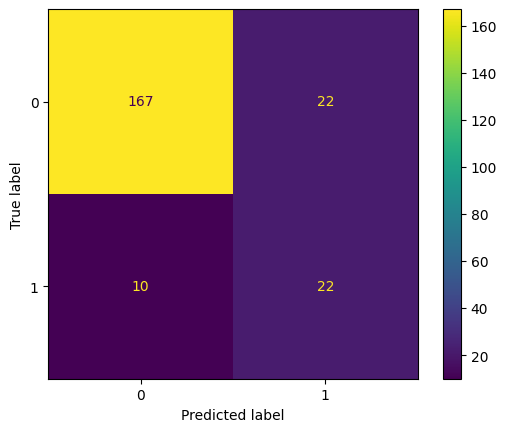

Accuracy: 0.86
Precision: 0.5
Recall: 0.69
Weighted F1 Score: 0.86


In [775]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))
print("Precision:",round(metrics.precision_score(y_test, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_test, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_test, y_pred,average ='weighted'),2))

**Optimized SVM**

In [776]:
from sklearn.svm import SVC

start = time.time()
grid = {
        'C': [0.1, 1, 10, 100],
        "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
        "degree":[3, 4, 5, 6],
        "max_iter":[2000, 2500, 3000]
        }

svm_opt =  SVC(random_state=SEED)
svm_opt = GridSearchCV(svm_opt, grid, refit = True, cv=5)
svm_opt.fit(X_train, y_train)

SVMO_time = time.time() - start

In [777]:
svm_opt = svm_opt.best_estimator_

Confusion Matrix:


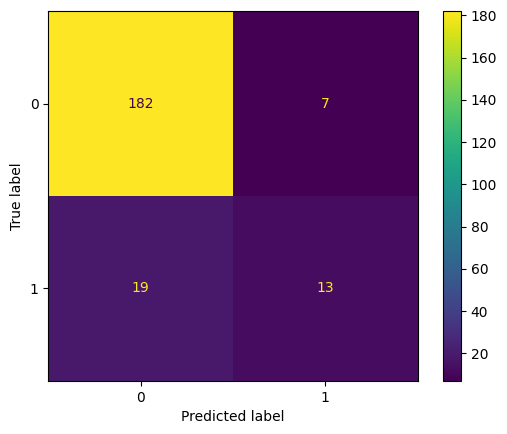

Accuracy: 0.88
Precision: 0.65
Recall: 0.41
Weighted F1 Score: 0.87


In [778]:
y_pred = svm_opt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))
print("Precision:",round(metrics.precision_score(y_test, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_test, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_test, y_pred,average ='weighted'),2))


**Optimized Random Forest**

In [779]:
start = time.time()
param_grid = {
        'n_estimators': [50, 100, 150, 200,275,400],
        'criterion' :['gini', 'entropy'],
        'max_depth' : [5, 10, 15, 20],
        'max_samples': [480, 720, 960, 1080]
}

rf_opt = RandomForestClassifier()
grid_search = GridSearchCV(scoring="roc_auc",estimator = rf_opt,refit = True, param_grid = param_grid, cv = 5)

In [780]:
grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_

**En iyi f1 score'unu veren thresholdun seçilmesi**

In [781]:
thresholds = np.arange(0.1,0.4,0.025)
max_f1 = 0
opt_threshold_for_random_forest = None
for threshold in thresholds:
    y_pred = (rf_best.predict_proba(X_test)[:,1]>=threshold).astype(int)
    if metrics.f1_score(y_test, y_pred) > max_f1:
        max_f1 = metrics.f1_score(y_test, y_pred)
        opt_threshold_for_random_forest = threshold

RFO_time = time.time()-start

In [782]:
y_pred = (rf_best.predict_proba(X_test)[:,1]>=opt_threshold_for_random_forest).astype(int)

Confusion Matrix:


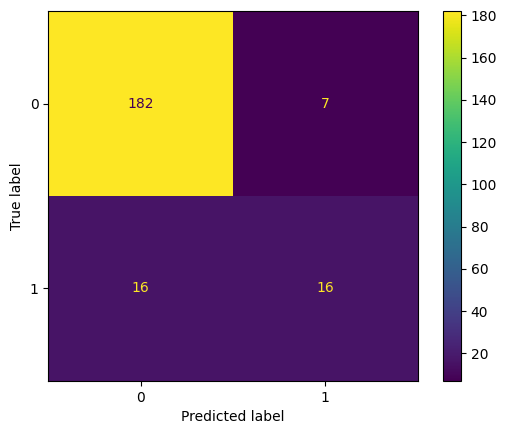

Accuracy: 0.9
Precision: 0.7
Recall: 0.5
Weighted F1 Score: 0.89


In [783]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("Confusion Matrix:")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))
print("Precision:",round(metrics.precision_score(y_test, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_test, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_test, y_pred,average ='weighted'),2))

# Optimize Modellerin Başarıma Etkisi

In [784]:
y_pred_LRO = (logistic_reg_opt.predict_proba(X_validation)[:,1]>=optimal_threshold).astype(int)
y_pred_SVMO = svm_opt.predict(X_validation)
y_pred_RFO = (rf_best.predict_proba(X_validation)[:,1]>=opt_threshold_for_random_forest).astype(int)

acc = [round(metrics.accuracy_score(y_validation, y_pred_LRO),2),
                round(metrics.accuracy_score(y_validation, y_pred_SVMO),2),
                round(metrics.accuracy_score(y_validation, y_pred_RFO),2)]

pre = [round(metrics.precision_score(y_validation, y_pred_LRO),2),
                round(metrics.precision_score(y_validation, y_pred_SVMO),2),
                round(metrics.precision_score(y_validation, y_pred_RFO),2)]

rec = [round(metrics.recall_score(y_validation, y_pred_LRO),2),
                round(metrics.recall_score(y_validation, y_pred_SVMO),2),
                round(metrics.recall_score(y_validation, y_pred_RFO),2)]
f1 = [round(metrics.f1_score(y_validation, y_pred_LRO,average ='weighted'),2),
                round(metrics.f1_score(y_validation, y_pred_SVMO,average ='weighted'),2),
                round(metrics.f1_score(y_validation, y_pred_RFO,average ='weighted'),2)]

opt_metric_df = pd.DataFrame({"Accuracy":acc, "Precision":pre,"Recall":rec,"Weighted F1":f1},
                            index=["Optimized Logistic Regression","Optimized SVM","Optimized Random Forest"])


In [785]:
compared = pd.concat([metric_df,opt_metric_df])
compared

Accuracy  Precision  Recall  Weighted F1
Logistic Regression                0.84       0.57    0.32         0.41
SVM                                0.84       0.54    0.39         0.45
Random Forest                      0.85       0.83    0.13         0.23
Optimized Logistic Regression      0.81       0.47    0.74         0.82
Optimized SVM                      0.89       0.71    0.63         0.89
Optimized Random Forest            0.85       0.63    0.32         0.83

**Yukarıdaki tabloda görüldüğü üzere hyperparameter optimizasyonu ve Logistic Regression ile Random Forest algoritmalarında yaptığımız threshold düzenlemeleri modellerin Recall değerlerini önemli ölçüde artırdı. Datamızda 1-0 dağılımı dengesiz olduğu için optimize olmayan modellerde model 0'ları çok daha iyi tahmin ederken 1'leri kaçırıyordu. Accuracy değerleri yüksek olsa bile aslında modeller istediğimiz şeyi yapmıyordu. Recall değerlerinin artırılmasıyla birlikte modellerin kullanımı daha sağlıklı hale gelmiştir.**

**Optimize modellerin train edilme hızları**

In [786]:
print("Optimized Logistic Regression running time:",LRO_time)
print("Optimized SVM running time:",SVMO_time)
print("Optimized Random Forest running time:",RFO_time)

Optimized Logistic Regression running time: 1.2875449657440186
Optimized SVM running time: 33.32551598548889
Optimized Random Forest running time: 198.6619429588318


**En iyi modelin(Optimized Logistic Regression) kaydedilmesi:**

In [787]:
import pickle
pickle.dump([logistic_reg_opt,optimal_threshold], open('model.pickle', 'wb'))

# En İyi 5 Feature ile En İyi Modelin Tekrar Test Edilmesi

In [788]:
from sklearn.feature_selection import SelectKBest
best5 = SelectKBest(k=5).fit_transform(X_train,y_train)

In [789]:
cols = []
for values in range(5):
    cols.append(best5[:,values])

In [790]:
best_columns_names = []
for i in range(5):
    for column in X_train.columns:
        if np.array_equal(X_train[column],cols[i]):
            best_columns_names.append(column)


In [791]:
X_train_best = X_train[best_columns_names]
start = time.time()
logistic_reg_opt.fit(X_train_best, y_train)

LogisticRegressionCV(cv=5, random_state=12345)

	  Confusion Matrix


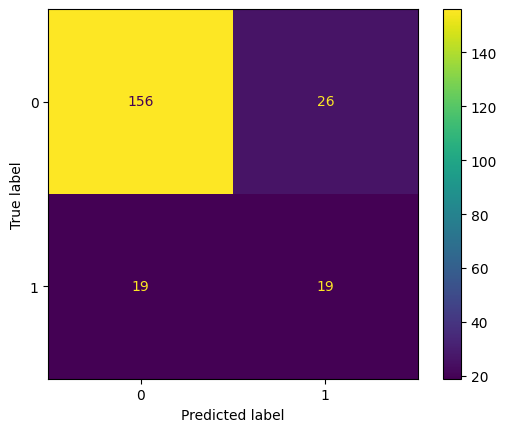

Accuracy: 0.8
Precision: 0.42
Recall: 0.5
Weighted F1 Score: 0.8
run time: 0.3029952049255371


In [792]:
X_validation_best = X_validation[best_columns_names]

y_pred = (logistic_reg_opt.predict_proba(X_validation_best)[:,1]>=optimal_threshold).astype(int)

end = time.time()
confusion_matrix = metrics.confusion_matrix(y_validation, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\t  Confusion Matrix")
plt.show()
print("Accuracy:",round(metrics.accuracy_score(y_validation, y_pred),2))
print("Precision:",round(metrics.precision_score(y_validation, y_pred),2)) 
print("Recall:",round(metrics.recall_score(y_validation, y_pred),2))
print("Weighted F1 Score:",round(metrics.f1_score(y_validation, y_pred,average ='weighted'),2))

print("run time:",end-start)

In [793]:
acc = [round(metrics.accuracy_score(y_validation, y_pred),2)]

pre = [round(metrics.precision_score(y_validation, y_pred),2)]

rec = [round(metrics.recall_score(y_validation, y_pred),2)]

f1 = [round(metrics.f1_score(y_validation, y_pred),2)]

comparison = pd.DataFrame({"Accuracy":acc, "Precision":pre,"Recall":rec,"Weighted F1":f1},
                            index=["Best 5 Feature Random Forest"])

comparison.loc[len(comparison.index)] = compared.loc["Optimized Random Forest"]
comparison.index = ['Best 5 Feature Random Forest', 'Optimized Random Forest with Original Features']


In [794]:
comparison

Accuracy  Precision  Recall  \
Best 5 Feature Random Forest                        0.80       0.42    0.50   
Optimized Random Forest with Original Features      0.85       0.63    0.32   

                                                Weighted F1  
Best 5 Feature Random Forest                           0.46  
Optimized Random Forest with Original Features         0.83